<a href="https://colab.research.google.com/github/igormartins0301/Analises_exploratorias_dados/blob/main/Projeto1_An%C3%A1lise_de_Instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib

In [ ]:
base = pd.read_excel(r'C:\Users\Igor\Desktop\Analisando o engajamento no Instagram.xlsx')

In [ ]:
base.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


In [ ]:
#Removendo a coluna visualizações
base.drop('Visualizações',axis=1,inplace=True)

In [ ]:
#Encontrando valores nulos em cada coluna
base.isna().sum()

Tipo            0
Data            0
Curtidas        0
Comentários     0
Tags            8
Pessoas         0
Campanhas       0
Carrossel      44
Interacoes      0
dtype: int64

In [ ]:
#Entendendo quais são as respostas para a coluna carrosel
base['Carrossel'].value_counts()

S    8
Name: Carrossel, dtype: int64

In [ ]:
#Substituir NaN por 'N'
#base['Carrossel'].fillna('N', inplace = True)

#Outra forma de fazer a mesma coisa
base.loc[base['Carrossel'].isnull(),'Carrossel']='N'

In [ ]:
base['Carrossel'].value_counts()

N    44
S     8
Name: Carrossel, dtype: int64

### Informações estatísticas

In [ ]:
base.describe()

,Curtidas,Comentários,Interacoes
count,52.000000,52.000000,52.000000
mean,12262.730769,189.500000,12452.230769
std,8165.875326,170.687709,8299.390088
min,2807.000000,9.000000,2816.000000
25%,5492.000000,69.500000,5562.500000
50%,9603.000000,128.000000,9773.500000
75%,17621.750000,265.250000,17920.750000
max,37351.000000,852.000000,37853.000000


### Visualizando informações de forma gráfica

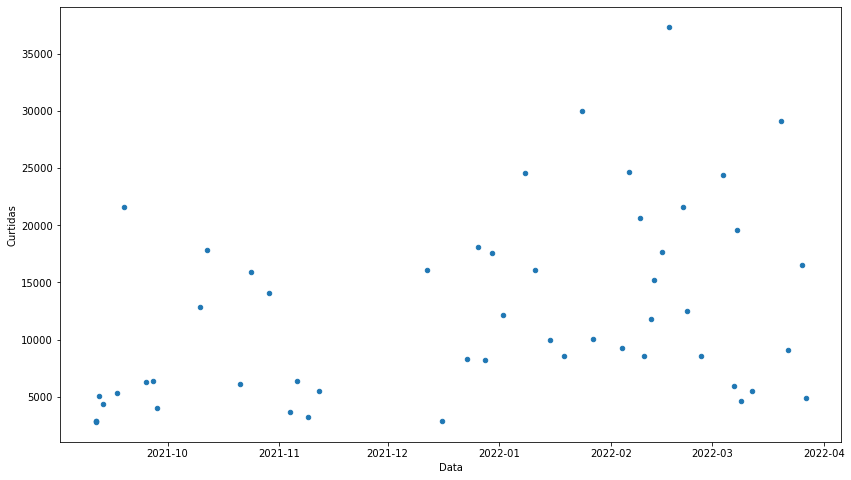

In [ ]:
#Gráfico de dispersão para entender melhor curtidas e comentários no tempo
base.plot.scatter(x="Data", y="Curtidas",figsize=(14,8));

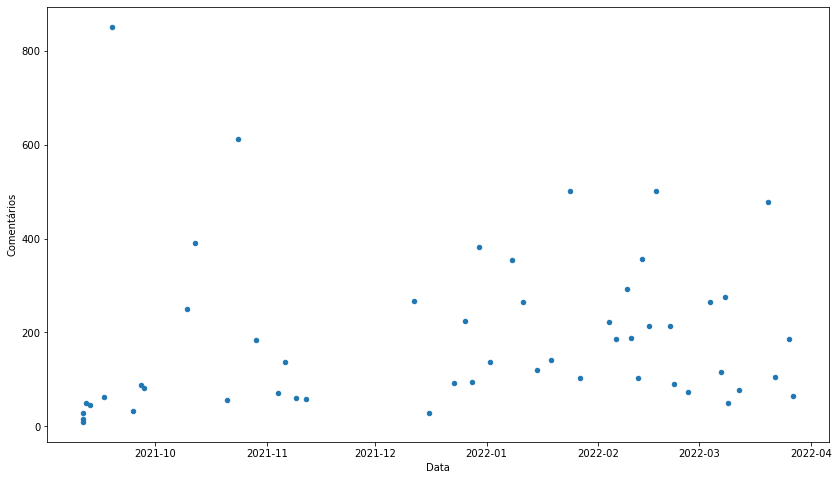

In [ ]:
base.plot.scatter(x="Data", y="Comentários",figsize=(14,8));

- Os gráficos não foram suficientes para entender o comportamento de curtidas e comentários ao decorrer do tempo

### Pegar os 5 primeiros registros para entender se existe algo em comum entre eles

In [ ]:
#Ordenando valores
mais_curtidos = base.sort_values(by='Curtidas',ascending=False).head(5)
mais_curtidos.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


### Agrupar valores para entender se algum grupo possui melhores resultados nas postagens

In [ ]:
#Analisando todos os resultados de acordo com o tipo
base.groupby(by='Tipo').mean()

,Curtidas,Comentários,Interacoes
Tipo,,,
Foto,13481.447368,196.578947,13678.026316
IGTV,6833.400000,133.600000,6967.000000
Reels,14543.166667,245.166667,14788.333333
Vídeo,8141.500000,166.833333,8308.333333


- Aparentemente Reels e Fotos geram mais engajamento nos Posts.

In [ ]:
#Caso queira analisar só um resultado, pode ser feito dessa forma
base.groupby(by='Tipo')['Curtidas'].mean()

Tipo
Foto     13341.138889
IGTV      6833.400000
Reels    14873.000000
Vídeo     8141.500000
Name: Curtidas, dtype: float64

In [ ]:
#Utilizando mais de uma coluna para agrupar
base.groupby(by=['Tipo','Pessoas'])[['Curtidas','Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas                           
Foto  N         3863.500000        29.50
      S        15236.666667       226.20
IGTV  S         6833.400000       133.60
Reels N         5934.500000        98.00
      S        20832.000000       342.00
Vídeo N         4007.500000        65.25
      S        16409.500000       370.00

In [ ]:
#Incluindo coluna campanhas
base.groupby(by=['Tipo','Pessoas','Campanhas']).mean().sort_values('Curtidas',ascending=False)

,,,Curtidas,Comentários,Interacoes
Tipo,Pessoas,Campanhas,,,
Reels,S,S,24801.000000,388.500000,25189.500000
Foto,S,S,19692.352941,295.647059,19988.000000
Vídeo,S,S,16409.500000,370.000000,16779.500000
Reels,S,N,12894.000000,249.000000,13143.000000
Foto,S,N,10815.285714,159.928571,10975.214286
IGTV,S,N,6833.400000,133.600000,6967.000000
Reels,N,N,5934.500000,98.000000,6032.500000
Foto,N,S,5852.500000,47.500000,5900.000000
Vídeo,N,N,4007.500000,65.250000,4072.750000


- Com esse agrupamento, fica nítido que a presença de pessoas nos Posts traz um resultado muito melhor em relação a curtidas, independente de qual o tipo de postagem feito.

### É necessário filtrar a base apenas com fotos para analisar Carrossel, pois não existem Carrosséis em vídeo.

In [ ]:
#Pode-se Filtrar a base antes de agrupar
foto = base.loc[base['Tipo']=='Foto']
foto.groupby(by='Carrossel')[['Curtidas','Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,13776.357143,208.571429
S,11817.875000,140.375000


### Tratando a coluna "Tags"

In [ ]:
#Analisando quais os tipos de dados estão presentes na coluna Tags
base.Tags.value_counts()

Produtos                             12
Novos Produtos                        7
Influenciadores                       7
Datas comemorativas                   3
Trends                                3
Dicas de como usar/Produtos           3
Loja                                  2
Promoções                             2
Dicas de como usar/Novos Produtos     2
Loja/Produtos                         1
Trends/Produtos                       1
Datas comemorativas/Promoções         1
Name: Tags, dtype: int64

In [ ]:
#Utilziar a função split para separar todas os dados que possuam tags com "/"
base['Tags'] = base.Tags.str.split('/')
base['Tags'].head()

0              [Loja]
1    [Loja, Produtos]
2              [Loja]
3          [Produtos]
4          [Produtos]
Name: Tags, dtype: object

In [ ]:
#Função explode acrescenta uma linha a mais para cada dado que foi splitado anteriormente.
base = base.explode('Tags')
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja,N,N,N,2958
1,Foto,2021-09-11,2930,28,Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164


### A partir desse momento só podem ser feitas análises referentes as TAGS, pois todas as outras colunas foram duplicadas em casos de 2 tags por linha, portanto trazem valores incorretos

In [ ]:
#Agrupando os resultados por tags, encontrando a média de cada coluna de valor e ordenando por curtidas.
base.groupby('Tags').mean().sort_values('Curtidas', ascending = False)

,Curtidas,Comentários,Interacoes
Tags,,,
Promoções,27458.333333,531.000000,27989.333333
Datas comemorativas,20752.250000,343.500000,21095.750000
Trends,20024.000000,352.250000,20376.250000
Influenciadores,15197.285714,161.714286,15359.000000
Novos Produtos,10304.888889,198.555556,10503.444444
Dicas de como usar,6833.400000,133.600000,6967.000000
Produtos,6269.823529,94.117647,6363.941176
Loja,2865.000000,17.666667,2882.666667


In [ ]:
#Filtrando valores sem tags
base.loc[base.Tags.isnull()] 

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,NaN,S,S,N,18222
19,Foto,2021-12-12,16086,268,NaN,S,S,N,16354
29,Foto,2022-01-19,8612,142,NaN,S,N,N,8754
38,Foto,2022-02-15,17687,213,NaN,S,N,N,17900
41,Foto,2022-02-22,12530,90,NaN,S,N,N,12620
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665
49,Foto,2022-03-22,9087,106,NaN,S,S,N,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,N,16737


In [ ]:
#Atribuindo valores para essa coluna com o Loc
base.loc[base['Tags'].isnull(),'Tags'] = 'Sem Tag'

In [ ]:
base.Tags.value_counts()

Produtos               17
Novos Produtos          9
Sem Tag                 8
Influenciadores         7
Dicas de como usar      5
Trends                  4
Datas comemorativas     4
Loja                    3
Promoções               3
Name: Tags, dtype: int64

In [ ]:
#Agrupando os resultados por tags, encontrando a média de cada coluna de valor e ordenando por curtidas.
base.groupby('Tags').mean().sort_values('Curtidas', ascending = False)

,Curtidas,Comentários,Interacoes
Tags,,,
Promoções,27458.333333,531.000000,27989.333333
Datas comemorativas,20752.250000,343.500000,21095.750000
Trends,20024.000000,352.250000,20376.250000
Sem Tag,15347.875000,207.750000,15555.625000
Influenciadores,15197.285714,161.714286,15359.000000
Novos Produtos,10304.888889,198.555556,10503.444444
Dicas de como usar,6833.400000,133.600000,6967.000000
Produtos,6269.823529,94.117647,6363.941176
Loja,2865.000000,17.666667,2882.666667


In [ ]:
base.groupby(by=['Campanhas','Pessoas','Tags'])[['Curtidas','Comentários']].mean().sort_values('Curtidas',ascending=False)

Curtidas  Comentários
Campanhas Pessoas Tags                                          
S         S       Promoções            33217.500000   490.500000
                  Trends               22400.666667   386.666667
                  Datas comemorativas  20752.250000   343.500000
                  Influenciadores      18715.400000   197.600000
                  Sem Tag              16850.750000   257.750000
N         S       Promoções            15940.000000   612.000000
S         S       Novos Produtos       13881.500000   453.500000
N         S       Sem Tag              13845.000000   157.750000
                  Trends               12894.000000   249.000000
S         S       Produtos             11802.000000   102.000000
N         S       Novos Produtos        9937.000000   136.333333
                  Produtos              7818.428571   135.857143
                  Dicas de como usar    6833.400000   133.600000
                  Influenciadores       6402.000000    72.000000
S         N       Produtos              6346.000000    33.000000
                  Novos Produtos        5359.000000    62.000000
N         N       Produtos              4213.750000    64.250000
                  Loja                  2865.000000    17.666667

## Conclusão da análise

- Ter o rosto de outras pessoas é fundamental para o engajamento da publicação.
- Criar campanhas ajuda muito na divulgação da marca.
- Promoções tiveram um resultado absurdamente maior em relação a outras Tags.
- Usar conteúdos que estão em Trends ajudam muito na divulgação.
